In [1]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from kmeans import *
from tf_idf import *
from data import *
import pandas as pd
import numpy as np
from rfm import *
from graph import *

In [2]:
df = load_data()

# Evaluate the best number of Cluster

In [3]:
matrix = tf_idf(df)

In [4]:
sse, sscore, test_range = kmeans(matrix)

Clusters = 2 ,Silhouette Score = 0.06539
Clusters = 3 ,Silhouette Score = 0.0973
Clusters = 4 ,Silhouette Score = 0.12028
Clusters = 5 ,Silhouette Score = 0.13913
Clusters = 6 ,Silhouette Score = 0.14752
Clusters = 7 ,Silhouette Score = 0.11348
Clusters = 8 ,Silhouette Score = 0.11572
Clusters = 9 ,Silhouette Score = 0.09053
Clusters = 10 ,Silhouette Score = 0.07174
Clusters = 11 ,Silhouette Score = 0.07746
Clusters = 12 ,Silhouette Score = 0.07798
Clusters = 13 ,Silhouette Score = 0.06229
Clusters = 14 ,Silhouette Score = 0.04501


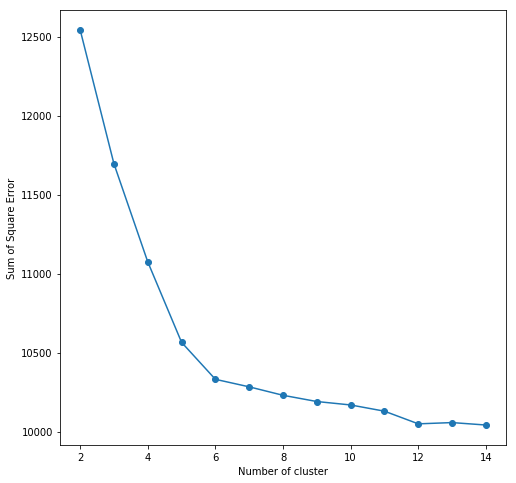

In [5]:
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

In [6]:
clusters = kmeans(matrix = matrix, cluster_num = 6, score = sscore[6] )

In [7]:
def silhouette_graph(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

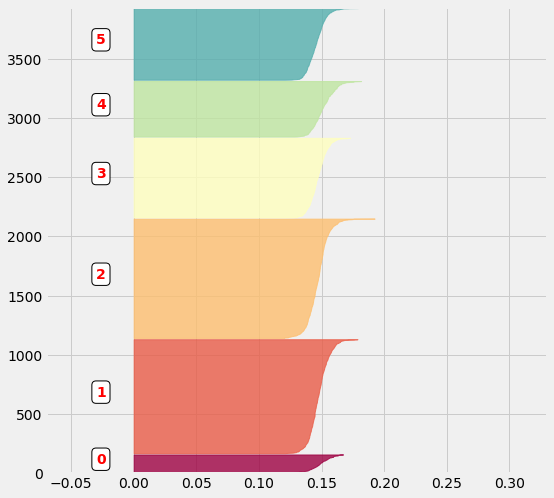

In [8]:
# Plot Silhouette graph
sample_silhouette_values = silhouette_samples(matrix, clusters)
silhouette_graph(6, [-0.07, 0.33], len(matrix), sample_silhouette_values, clusters)

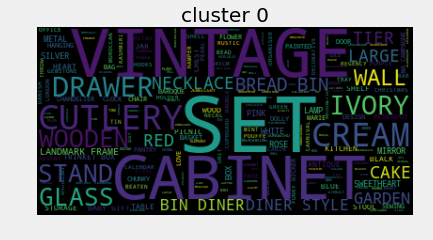

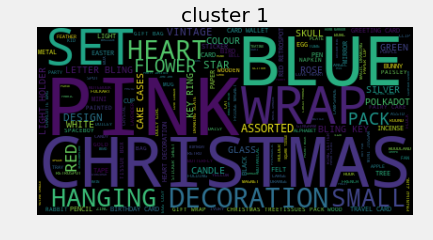

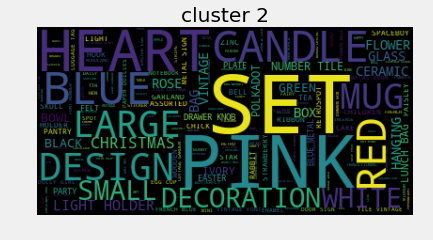

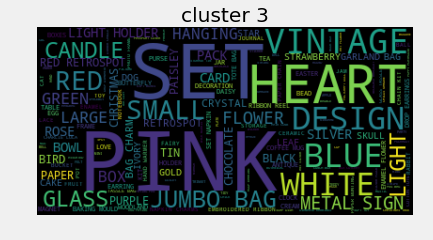

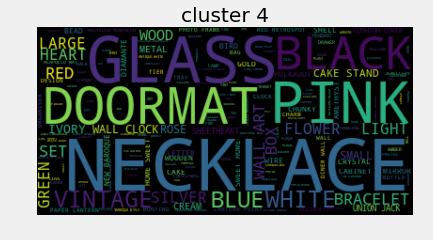

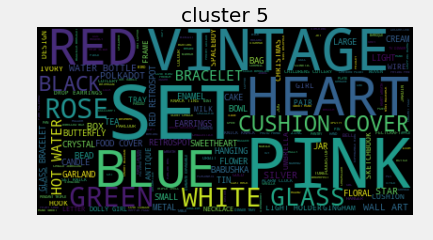

In [9]:
# Plot word cloud
d_list = df['Description'].unique().tolist()
prod_cluster = defaultdict(list)
for i in range(len(clusters)):
    cluster_num = clusters[i]
    prod_cluster[cluster_num].append(d_list[i])
for i in range(len(prod_cluster)):
    s = " "
    words = s.join(prod_cluster[i])
    wordcloud = WordCloud().generate(text = words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('cluster {}'.format(i))
    plt.show()

In [10]:
df = tf_idf_write_back(df,clusters)

In [11]:
tf_idf_rfm = rfm(df,1)
tf_idf_rfm.head(10)

,CustomerID,Frequency,Recency,Amount,cate_0,cate_1,cate_2,cate_3,cate_4,cate_5
0,17850,34,372,5391.21,607.75,0.00,594.12,1048.50,1262.80,1878.04
1,13047,9,56,3232.59,140.80,277.18,494.78,536.48,826.45,956.90
2,12583,15,2,6705.38,230.25,1448.88,1532.50,1166.40,245.25,2082.10
3,13748,5,95,948.25,93.65,52.68,147.00,577.32,29.40,48.20
4,15100,3,333,876.00,876.00,0.00,0.00,0.00,0.00,0.00
5,15291,14,25,4623.30,179.05,207.48,978.46,500.76,1972.95,784.60
6,14688,21,7,5579.10,25.00,900.10,1140.47,2120.08,428.85,964.60
7,17809,12,16,5411.91,0.00,127.38,1232.89,783.00,1843.15,1425.49
8,15311,91,0,60632.75,755.00,4780.97,18800.67,22712.55,7703.65,5879.91
9,16098,7,87,2005.63,528.20,45.67,93.30,551.96,382.50,404.00


In [12]:
matrix = rfm_matrix(tf_idf_rfm)
sse, sscore, test_range = kmeans(matrix)

Clusters = 2 ,Silhouette Score = 0.71417
Clusters = 3 ,Silhouette Score = 0.63272
Clusters = 4 ,Silhouette Score = 0.53676
Clusters = 5 ,Silhouette Score = 0.55335
Clusters = 6 ,Silhouette Score = 0.53858
Clusters = 7 ,Silhouette Score = 0.509
Clusters = 8 ,Silhouette Score = 0.52526
Clusters = 9 ,Silhouette Score = 0.44358
Clusters = 10 ,Silhouette Score = 0.4427
Clusters = 11 ,Silhouette Score = 0.42757
Clusters = 12 ,Silhouette Score = 0.45274
Clusters = 13 ,Silhouette Score = 0.45845
Clusters = 14 ,Silhouette Score = 0.45577


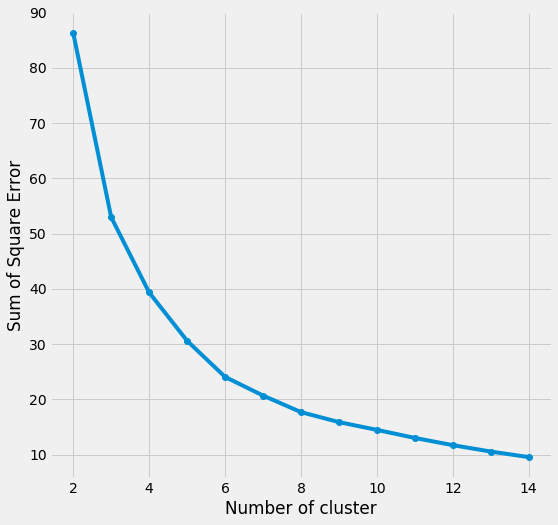

In [13]:
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

In [14]:
clusters = kmeans(matrix = matrix, cluster_num = 5, score = sscore[5] )
len(clusters)

4322

In [15]:
tf_idf_rfm = rfm_write_back(tf_idf_rfm,clusters) 
tf_idf_rfm.head(10)

,CustomerID,Frequency,Recency,Amount,cate_0,cate_1,cate_2,cate_3,cate_4,cate_5,Group
0,17850,34,372,5391.21,607.75,0.00,594.12,1048.50,1262.80,1878.04,3
1,13047,9,56,3232.59,140.80,277.18,494.78,536.48,826.45,956.90,2
2,12583,15,2,6705.38,230.25,1448.88,1532.50,1166.40,245.25,2082.10,0
3,13748,5,95,948.25,93.65,52.68,147.00,577.32,29.40,48.20,2
4,15100,3,333,876.00,876.00,0.00,0.00,0.00,0.00,0.00,3
5,15291,14,25,4623.30,179.05,207.48,978.46,500.76,1972.95,784.60,0
6,14688,21,7,5579.10,25.00,900.10,1140.47,2120.08,428.85,964.60,0
7,17809,12,16,5411.91,0.00,127.38,1232.89,783.00,1843.15,1425.49,0
8,15311,91,0,60632.75,755.00,4780.97,18800.67,22712.55,7703.65,5879.91,4
9,16098,7,87,2005.63,528.20,45.67,93.30,551.96,382.50,404.00,2


In [16]:
tf_idf_rfm.groupby('Group', as_index = False)['CustomerID'].count()
tf_idf_rfm.rename(columns={'Group': 'Cluster'}, inplace=True)

In [17]:
n_attributes = len(tf_idf_rfm.columns) - 5
customer_clustering = df_for_chart(tf_idf_rfm, n_attributes)
display(customer_clustering)

,Sum $,Med. $,Size,Med. Visit,Median $ per Visit,cate_0,cate_0 mean,cate_0 std,cate_1,cate_1 mean,...,cate_2 std,cate_3,cate_3 mean,cate_3 std,cate_4,cate_4 mean,cate_4 std,cate_5,cate_5 mean,cate_5 std
Cluster,,,,,,,,,,,,,,,,,,,,,
3,196596.36,264.700,497,1.0,224.910000,9.335295,36.927264,102.375208,10.190367,40.309638,...,122.274644,22.700074,89.793803,239.390808,18.775068,74.267807,168.787281,17.136014,67.784266,143.593535
2,1027074.15,631.340,1033,2.0,309.050000,5.652158,56.197338,147.940733,13.036347,129.615634,...,336.442467,23.472914,233.382604,433.180769,14.092392,140.115508,259.889729,18.070838,179.671742,362.101723
0,4866575.52,1101.970,2177,4.0,298.286667,5.807311,129.819554,424.518974,11.668555,260.844763,...,851.172174,24.229326,541.634571,1127.334570,15.372565,343.646059,849.099748,18.620653,416.255452,891.949825
4,1662404.25,61304.795,18,51.5,1575.261774,7.269384,6713.697222,9042.715904,9.019116,8329.676111,...,20569.061276,26.089838,24095.476667,16163.461170,19.135050,17672.326667,33008.925329,17.533314,16193.030556,11862.424686
1,371310.37,340.930,597,1.0,233.212500,18.684989,116.213233,1632.790470,11.100856,69.042931,...,180.056642,18.169913,113.009665,174.930235,16.027963,99.687588,184.705049,14.382278,89.452077,166.929209


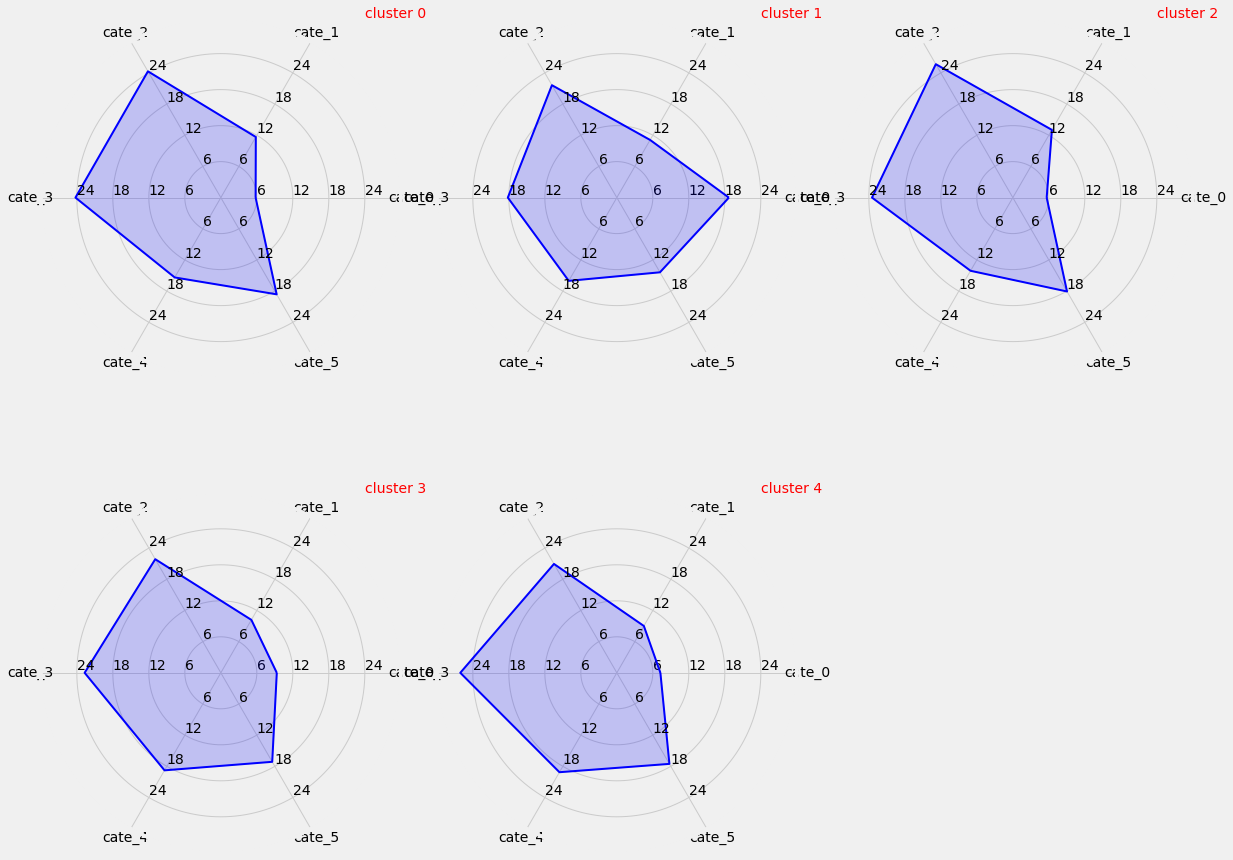

In [18]:
n_clusters = len(customer_clustering.index)
radar_chart(customer_clustering, n_clusters, n_attributes)

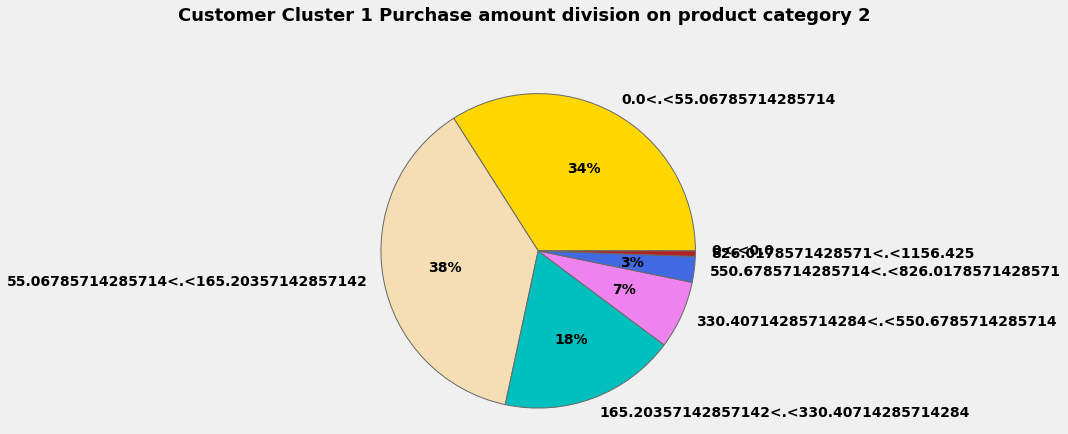

In [19]:
pie_chart(tf_idf_rfm, 1, 2)